# Project: Analysis of World Bank Development Indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will explore the gapminder data which holds a lot of World Bank Development Indicators. We will particularly focus on
<ul>
<li>Number of people living in poverty,</li>
<li>literacy rate,</li>
<li>Income per capita (gdp),</li>
<li>and unemplyment rate.</li></ul>

>By the end of this project, we would have found tentative answers to the following questions:

<ul>
<li>Is there a correlation between Number of people living in poverty, literacy rate, GDP, and unemployment?</li>
<li>Test for the significance of correlation?
</ul>
    My assumption is that countries with fewer number of citizens living in poverty, high literacy rate, and lower rate of unemployment should have a high GDP, and vice versa.

Let's now import the packages that we will be needing thoughout this project.

In [2]:
# import numpy, pandas, glob, matplotlib, and seaborn
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The next step would now be to load and explore the datasets that we will use for our analysis. Since we will be working with four different csv files, I find it more pythonic to glob all files using the glob module, rather than doing the tedious work of wrting out the file names. You will find the documentation to this module <a href='https://docs.python.org/3/library/glob.html'>here</a>, and can download the csv files from <a href='https://www.gapminder.org/data/'>here</a>.

### General Properties

In [3]:
data_files = glob('*.csv')
data_files

['aged_15plus_unemployment_rate_percent.csv',
 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
 'literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv',
 'number_of_people_in_poverty.csv']

>We now have a list of all our csv files as data_files. We will use index slicing to select each file.

In [4]:
# unemployment rate
unemployment_rate = pd.read_csv(data_files[0])

# gdp per capital
gdp = pd.read_csv(data_files[1])

# adult literacy rate
literacy_rate = pd.read_csv(data_files[2])

# number of people in poverty
poverty_rate = pd.read_csv(data_files[3])

In [5]:
# head
unemployment_rate.head()

,geo,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.49,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.10,13.7,14.10,13.50,13.40,15.90,17.5,17.1,15.2,13.7
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.30,10.2,9.96,9.96,11.00,9.82,10.2,11.2,10.2,12.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.36,NaN,NaN,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# head
gdp.head()

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9520,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6180,6260,6230,6020,5940,5850


In [7]:
# a random sample of five rows
literacy_rate.sample(5)

,geo,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
131,Thailand,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,93.5,NaN,NaN,NaN,NaN,NaN,NaN
114,Sao Tome and Principe,NaN,NaN,NaN,NaN,NaN,NaN,57.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,69.5,NaN,NaN,NaN
119,Sierra Leone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,34.8,NaN,NaN,NaN,NaN,NaN,NaN,43.3
13,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.8,NaN,NaN,NaN,NaN,NaN,NaN
57,India,NaN,NaN,NaN,NaN,NaN,NaN,40.8,NaN,NaN,...,NaN,NaN,NaN,NaN,62.8,NaN,NaN,NaN,NaN,62.8


In [8]:
#summmary statistics
unemployment_rate.describe()

,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,2.000000,2.000000,2.000000,...,113.000000,121.000000,124.000000,123.000000,124.000000,119.000000,120.000000,106.000000,105.000000,87.000000
mean,3.9,3.8,5.9,5.3,3.3,3.0,2.400000,3.900000,3.450000,3.200000,...,7.691796,8.420785,8.760024,8.363691,8.727976,8.722244,8.129633,8.628330,8.290267,8.007885
std,NaN,NaN,NaN,NaN,NaN,NaN,0.707107,2.262742,1.343503,1.272792,...,6.702141,5.325396,6.382729,6.189074,6.149473,6.601463,6.135705,6.732989,5.944282,5.682421
min,3.9,3.8,5.9,5.3,3.3,3.0,1.900000,2.300000,2.500000,2.300000,...,0.310000,0.190000,0.350000,0.200000,0.480000,0.278000,0.180000,0.160000,0.140000,0.136000
25%,3.9,3.8,5.9,5.3,3.3,3.0,2.150000,3.100000,2.975000,2.750000,...,3.870000,5.120000,4.240000,4.215000,4.250000,4.165000,4.145000,4.360000,4.420000,4.195000
50%,3.9,3.8,5.9,5.3,3.3,3.0,2.400000,3.900000,3.450000,3.200000,...,5.980000,7.540000,7.415000,6.920000,7.405000,6.950000,6.515000,6.815000,6.330000,6.160000
75%,3.9,3.8,5.9,5.3,3.3,3.0,2.650000,4.700000,3.925000,3.650000,...,8.940000,10.000000,10.850000,10.700000,11.650000,11.750000,10.300000,10.142500,9.730000,9.460000
max,3.9,3.8,5.9,5.3,3.3,3.0,2.900000,5.500000,4.400000,4.100000,...,37.600000,32.200000,32.000000,31.400000,31.000000,29.000000,28.000000,36.500000,26.900000,27.400000


We can see the presence of missing values in the data which could be a result of the cost of carrying out the needed reasearch to estimate these indicators. For instance, for the rate of unemployment, the number of participating countries did however improved over the years, from 1 in 1947 to 124 in 2010. It is worthy of note that some of these researches are not carried out year after year but intervals of 2 to 6 six years.

You must have noticed that the indicators are in sepearate files with years as columns. It would however be a lot easier to work with these dataframes if they are reshaped to have the years as index column and the values for each indicator stacked in a single column. We will then go on to merge the dataframes into a single dataframe.

### Data Cleaning (Reshaping the datasets)

In [9]:
def melt_data(data):
    """This fucntion reshapes a dataframe using .melt() to return indicators in a single column
    """
    melted_data = data.melt(id_vars='geo', var_name = 'year', value_name = 'indicator')
    return melted_data

In [11]:
# reshape dataframes
melted_data_files = [pd.DataFrame(melt_data(pd.read_csv(data))) for data in data_files]

In [12]:
melted_data_files[0].head()

,geo,year,indicator
0,Afghanistan,1947,NaN
1,Albania,1947,NaN
2,Algeria,1947,NaN
3,Angola,1947,NaN
4,Antigua and Barbuda,1947,NaN


> Nice. The datafarmes are now in a shape that we want. The next step is to merge them into a single dataframe.

In [13]:
# merge dataframes
merged_data = melted_data_files[0]
for df in melted_data_files[1:]:
    merged_data = merged_data.merge(df, how = 'inner', on=['geo', 'year'])

In [14]:
merged_data.head()

,geo,year,indicator_x,indicator_y,indicator_x,indicator_y
0,Albania,1978,NaN,4350,NaN,NaN
1,Algeria,1978,NaN,9830,NaN,NaN
2,Angola,1978,NaN,4720,NaN,NaN
3,Argentina,1978,2.8,12700,NaN,NaN
4,Armenia,1978,NaN,3970,NaN,NaN


>The indicator names (indicator_x and indicator_y) are not descriptive and could be interpreted to mean anything. The next step would be to rename them and set the year as the index column.

In [15]:
# rename columns
merged_data.columns = ['country', 'year', 'unemployment_rate', 'gdp', 'literacy_rate', 'poverty_rate']

# set index column
merged_data.set_index('year', inplace=True)

In [16]:
merged_data.sample(5)

,country,unemployment_rate,gdp,literacy_rate,poverty_rate
year,,,,,
2010,Egypt,8.76,9860,72.0,NaN
1982,Niger,NaN,1250,NaN,NaN
2004,Yemen,16.20,4050,54.8,NaN
2001,Armenia,NaN,3220,99.4,0.576
2000,Moldova,2.30,2320,96.7,NaN


In [17]:
merged_data.shape

(4080, 5)

In [18]:
merged_data.describe()

,unemployment_rate,gdp,literacy_rate,poverty_rate
count,1848.000000,4080.000000,456.000000,935.000000
mean,9.251543,7111.211029,76.672785,13.483978
std,6.807222,6593.596177,22.503600,67.602952
min,0.050000,247.000000,9.390000,0.000000
25%,4.187500,1907.500000,62.800000,0.050750
50%,7.860000,4825.000000,85.000000,0.652000
75%,12.700000,10300.000000,94.100000,3.330000
max,53.700000,38600.000000,99.800000,838.000000


>The new dataframe has 4080 rows and 5 columns. We can find missing values in following columns: unemployment_rate, literacy_rate, and poverty_rate. 75% of countries have an unemployment rate, gdp, literacy rate, and poverty rate below 12.70%, 10300%, 94.10%, and 3.33% respectively.

> I am curious as to how these indicators have changed in some countries overtime. I will explore the indicators for China, Nigeria, and Brazil to satisfy my curiosity and to probably build some intuition about the data.

In [19]:
def graphs(data, indicator, title):
    """This function accepts three arguments (data, indicator name, and title) and returns a bar graph
    """
    # countries
    countries = ['China', 'Nigeria', 'Brazil']
    # filter
    mask = data[indicator].isnull()==False
    
    for country in countries:
        indicator_by_country = data[['country',indicator]][mask]
        df = indicator_by_country[indicator_by_country['country'] == country]
        #plot graph
        df.plot.bar(figsize=(7,6))
        plt.suptitle('{}: {}'.format(country, title), fontsize=14)
        plt.ylabel(title + ' (%)', fontsize=14)
        plt.xlabel(s='Year',fontsize=14);
    return

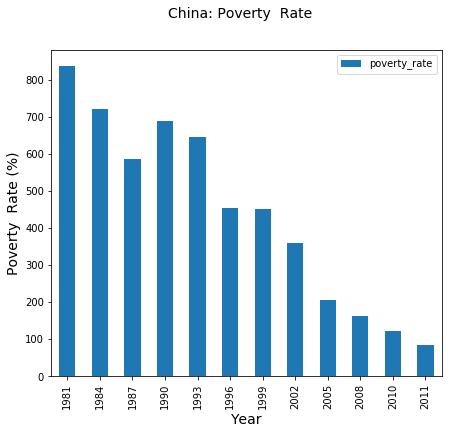

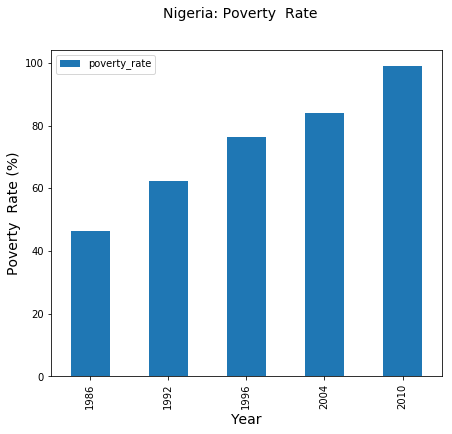

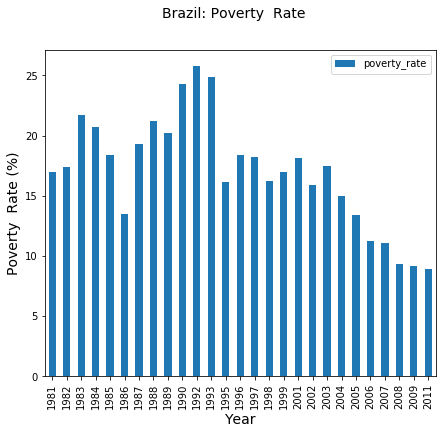

In [20]:
graphs(merged_data, 'poverty_rate', 'Poverty  Rate')

> While the poverty rate in china has reduced greatly since 1981, it has been a continued increase in Nigeria. Recent news says Nigeria is "the country with the largest number of extremely poor" citizens (check <a href=https://www.vanguardngr.com/2018/06/nigeria-overtakes-india-as-worlds-poverty-capital-report/>here</a> for more details). The highest poverty rate experiened in Brazil was during the early 1990s. The country has since then experiened a a slow but continued decline.

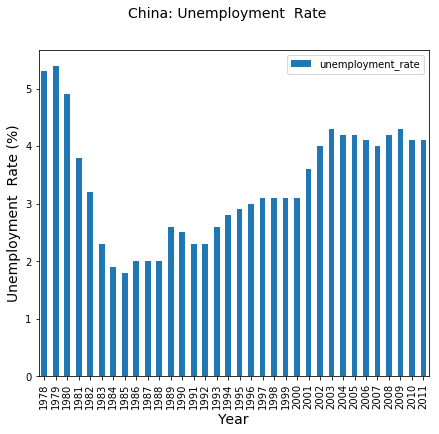

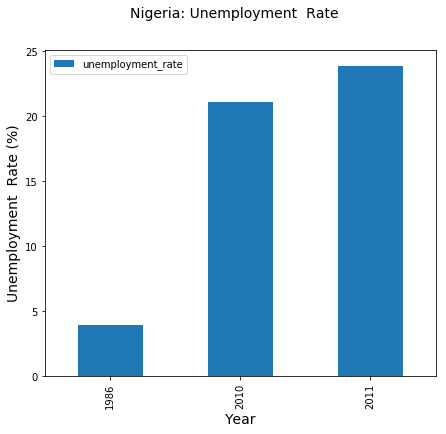

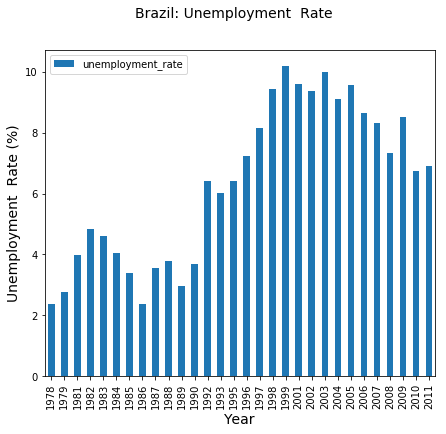

In [21]:
graphs(merged_data, 'unemployment_rate', 'Unemployment  Rate')

>It seems like China might be doing a good job at lifting a good number of its citizens out of poverty but it must consider creating more jobs as there has been a continued increase in the rate unemployment. For Nigeria, the case seems to be gloomy again, with about 25% of its adult popultion living without job. Brazil on the other hand might consider intensifying their efforts at creating more jobs.

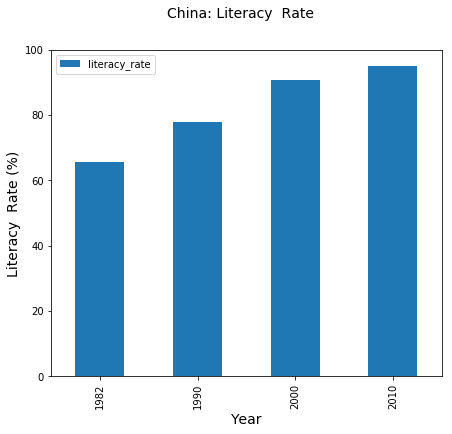

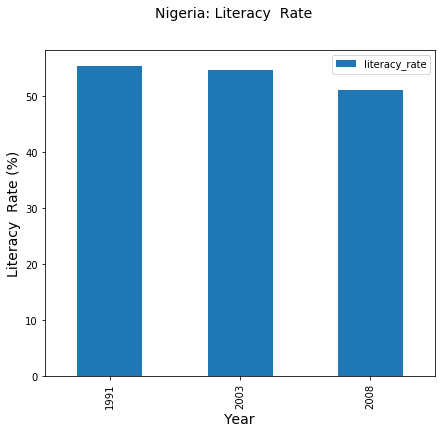

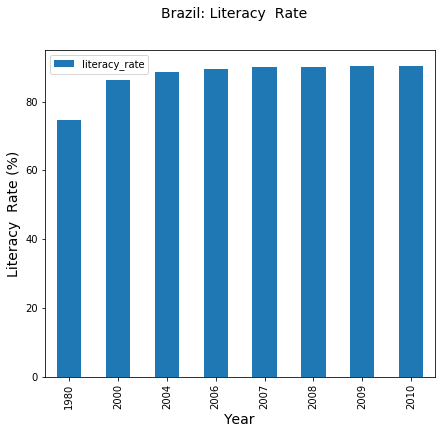

In [22]:
graphs(merged_data, 'literacy_rate', 'Literacy  Rate')

>Between 1986 and 2010 (that is a span of 24 years), China's literacy rate increased from a little about 60% to over 90%. This could be one of the many explanations for China's rise and subsequent reduction in poverty rate. While Brazil has also seen an increase in its literacy rate to over 90%, Nigeria had a little downfall. It seems this African country, Nigeria, has a lot of work to do.

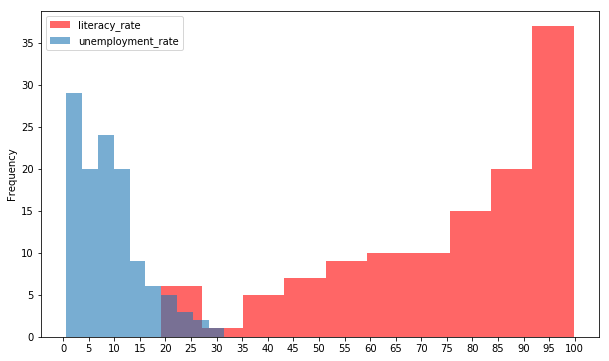

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.groupby('country')['literacy_rate'].mean().plot(kind='hist', alpha = 0.6, color='r')
merged_data.groupby('country')['unemployment_rate'].mean().plot(kind='hist', alpha = 0.6)
plt.xticks(np.arange(0,105,5))
plt.legend();

>The above histogram shows that more countries have a high literacy rate. It also seems to show that most the number of countries with umemplyment rate as high as 20% and above is quite low. This would be a good sign in more countries keep investing in eductaion and creating sustainable job oppotunities.

>We will now go on to do away with the years with missing values.

In [24]:
# drop na
indicators = merged_data.dropna()
indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1981 to 2011
Data columns (total 5 columns):
country              146 non-null object
unemployment_rate    146 non-null float64
gdp                  146 non-null int64
literacy_rate        146 non-null float64
poverty_rate         146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.8+ KB


In [25]:
indicators.head()

,country,unemployment_rate,gdp,literacy_rate,poverty_rate
year,,,,,
1981,Venezuela,7.00,17400,84.7,0.508
1986,Iran,14.20,10300,52.3,2.070
1990,China,2.50,1530,77.8,689.000
1990,Indonesia,2.51,4620,81.5,96.900
1991,Argentina,6.32,12000,96.1,0.321


> Wow, the data has drastically reduced. This is why it is better to not drop `nan` values but look for an alternative means like the mean of the data or forcast. We will however stick to dropping `nan` due to the enormous amount of missing vales.

> The remaining part of this analysis will focus on using data from 2011. I decided to use this year because it is the most recent year that holds data for all indicators for the maximum number of countries (23)

## Exploratory Data Analysis
### Countries with the maximum and minimum values for each indicator.

In [26]:
# filter
indicators_2011 = indicators.loc['2011':,:]

In [27]:
def summary(data):
    """This function takes a data and returns the maximum and minimum
    value for each indicator.
    """
    
    columns = indicators_2011.columns[1:]                          #indicators
    
    for col in columns:
        # maximum indicator value
        max_value = data[col].max()                                
        max_value_filter = data[data[col] == max_value]
        max_country = max_value_filter.country.values[0]
        
        # minimum indicator value
        min_value = data[col].min()
        min_value_filter = data[data[col] == min_value]
        min_country = min_value_filter.country.values[0]
        
        # print country, maximum and minimum indicators
        print('highest' + ' ' + col +'\n'+ ' ' + max_country+':', max_value)
        print('least' + ' ' + col +'\n'+ ' ' + min_country+':', min_value)
        print('\n')

In [28]:
summary(indicators_2011)

highest unemployment_rate
 South Africa: 24.7
least unemployment_rate
 Togo: 1.86


highest gdp
 Slovenia: 28800
least gdp
 Togo: 1230


highest literacy_rate
 Estonia: 99.8
least literacy_rate
 Togo: 60.4


highest poverty_rate
 Indonesia: 39.5
least poverty_rate
 Poland: 0.0




> For the 23 countries that have the needed data  in 2011, Slovenia had the highest gdp while togo had the least. It seems Togo was also the country with least literacy rate. The country with the highest proportion of its citizens living in poverty based on the records for 2011 was Indenosia. South Africa had the highest rate of unemployment.

> You will find below that countries like Slovenia and Poland that have the highest gdp and least proportion of poor citizens do have low rates of unemployment and literacy. That is interesting.

In [29]:
indicators_2011.set_index('country', inplace=True)    #set_index

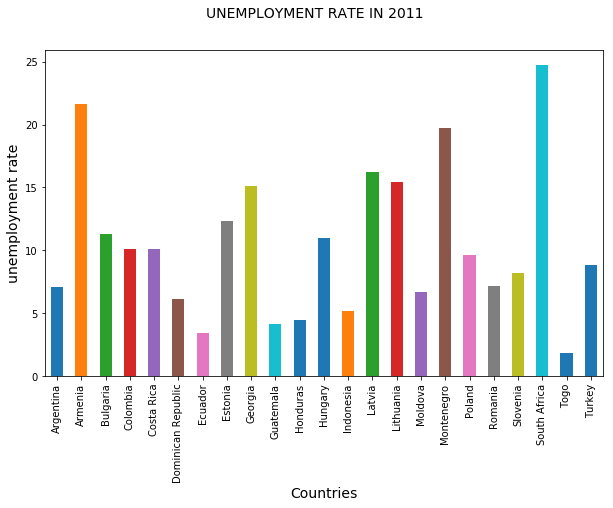

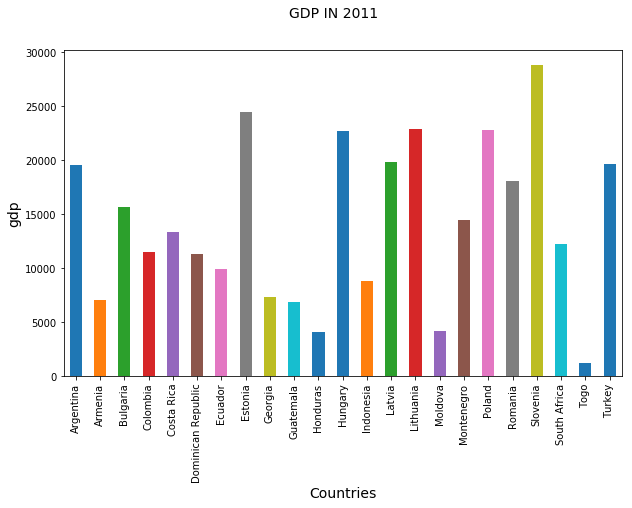

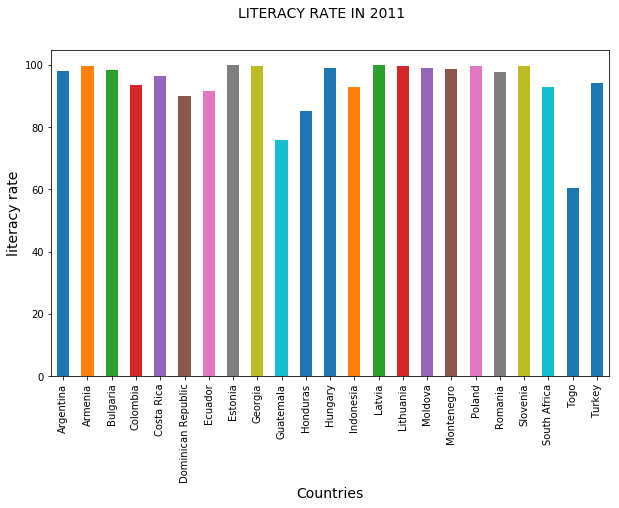

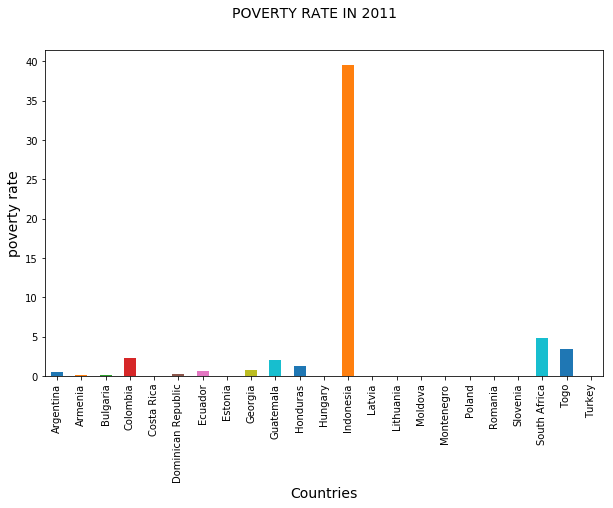

<Figure size 432x288 with 0 Axes>

In [36]:
#indicators
indicators_list = list(indicators_2011.columns)

for indicator in indicators_list:
    indicators_2011[indicator].plot.bar(figsize=(10,6))
    plt.suptitle(indicator.replace('_', ' ').upper() + ' IN 2011', fontsize=14)  # title
    plt.xlabel('Countries', fontsize=14)                                         # xlabel
    plt.ylabel(indicator.replace('_', ' '),fontsize=14)                  # ylabel
    plt.show()
    plt.clf()

> The last graph confirms our earlier finding that indonesia had a high rate of poverty as at 2011. We are careful not to name it the hieghest since the data is limited for a small number of countries.

### Correlation between Number of people living in poverty, literacy rate, GDP, and unemployment?

In [31]:
# correlation
r = indicators_2011.corr()
r

,unemployment_rate,gdp,literacy_rate,poverty_rate
unemployment_rate,1.000000,0.212909,0.512550,-0.179355
gdp,0.212909,1.000000,0.596958,-0.225849
literacy_rate,0.512550,0.596958,1.000000,-0.124178
poverty_rate,-0.179355,-0.225849,-0.124178,1.000000


> We can see that there is a moderate positive correlation between literacy and unemployment. The same can also be said of gdp and literacy. There seems to also be a weak negative correation between gdp and the number of people living in poverty, an indication that the number of people living in poverty seems to reduce as gdp increases. Let us visualize this using a heatmap and scatter matrix.

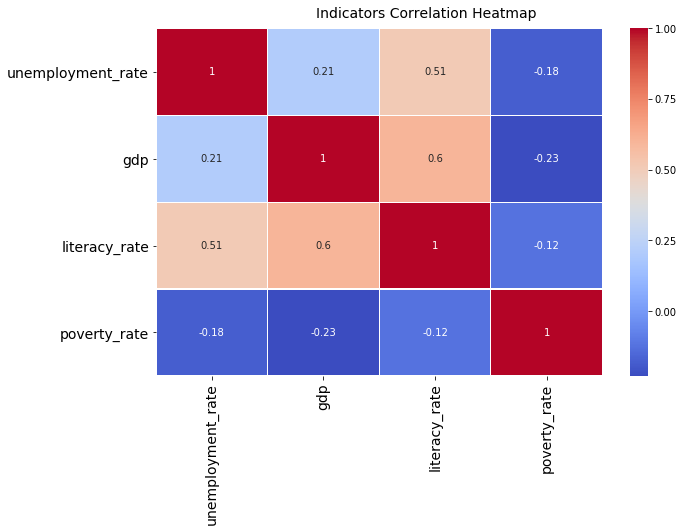

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
corr = indicators_2011.corr()

sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", linewidths=.05)

fig.subplots_adjust(top=0.93)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Indicators Correlation Heatmap', fontsize=14);

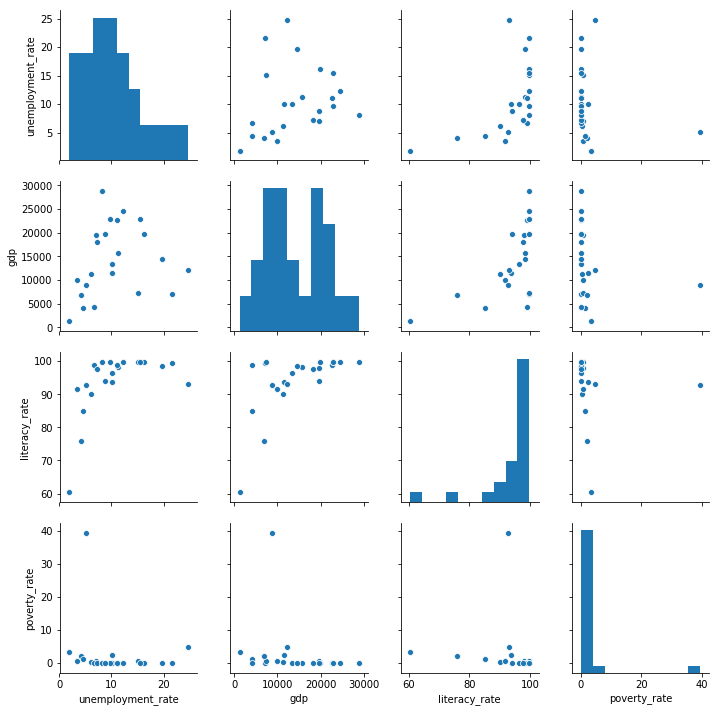

In [33]:
sns.pairplot(indicators_2011);

The above plots does a good justice to providing a fanstastic graphic summary. We can tentatively say that countries with high literacy rate, fewer number of unemployed citizens, and having a small proportion of its people citizens living below the poverty line have high gdps. This statement is tentative because we do not have a ruburst data and we are yet to use other advanced tools to investigate this data. So, it would me normal to find exceptions to this statement every now and then.

### Test for the significance of correlation
Since correlation does not always imply causation, we will carry out a test of significance to guide out decisons.
#### Hypothesis
<ul>
<li>H0: Inconclusive.</li>
<li>H1: There is significant correlation between unemployment, gdp, literacy, and poverty.</li>
</ul>

level of significance(alpha) = 0.05
>decision rule: if p-value is > alpha accept H0, else, accept H1.

In [34]:
# t-test of significance for correlation
# number of obervations = n (number of countries)
n = 23

#formular
t = r*np.sqrt((n-2)/(1-r*r))

t

,unemployment_rate,gdp,literacy_rate,poverty_rate
unemployment_rate,inf,0.998565,2.735436,-0.835455
gdp,0.998565,inf,3.409824,-1.062422
literacy_rate,2.735436,3.409824,inf,-0.573496
poverty_rate,-0.835455,-1.062422,-0.573496,inf


# Conclusion

### Result:
> Since the p-values for each pair of indicator is greater than the level of significance (0.05), we say that there is inconclusive evidence about the correlation between unemployment, gdp, literacy, and poverty. Further test or an alternative approach is recommended.
### Limitations:
>1. There is the problem of missing data caused by gaps in the years the selected indicators where estimated.
>2. The selected year of interest (2011) held data for a few number of countries (23) and could be dismissed as a good representative of the population.

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0